In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot



4423680/4422102 [==============================] - 0s 0us/step


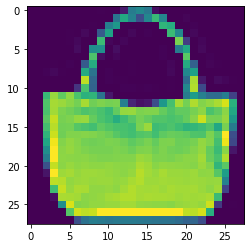

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_raw,Y_train_raw), (X_test_raw,Y_test_raw) = fashion_mnist.load_data()
plt.imshow(X_train_raw[100])

In [60]:
Y_train_raw[100]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names = np.array(class_names)
class_names[Y_train_raw[100]]

'Bag'

In [4]:
X_train_Norm = X_train_raw / 255.
X_test_Norm = X_test_raw / 255.

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_Norm, Y_train_raw, test_size = 0.1, random_state = 50)

#Sequential Model

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


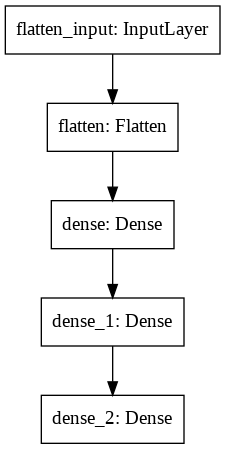

In [68]:
import pydoc
keras.utils.plot_model(model)

In [17]:

model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [18]:
model_history = model.fit(X_train, Y_train, verbose=2, epochs = 30, batch_size = 32, validation_data=(X_val,Y_val))

Epoch 1/30
1688/1688 - 3s - loss: 0.2923 - accuracy: 0.9072 - val_loss: 0.6657 - val_accuracy: 0.8678
Epoch 2/30
1688/1688 - 3s - loss: 0.2643 - accuracy: 0.9104 - val_loss: 0.6475 - val_accuracy: 0.8782
Epoch 3/30
1688/1688 - 3s - loss: 0.2547 - accuracy: 0.9117 - val_loss: 0.5505 - val_accuracy: 0.8765
Epoch 4/30
1688/1688 - 3s - loss: 0.2457 - accuracy: 0.9131 - val_loss: 0.5397 - val_accuracy: 0.8735
Epoch 5/30
1688/1688 - 3s - loss: 0.2468 - accuracy: 0.9124 - val_loss: 0.5047 - val_accuracy: 0.8792
Epoch 6/30
1688/1688 - 3s - loss: 0.2350 - accuracy: 0.9161 - val_loss: 0.5816 - val_accuracy: 0.8753
Epoch 7/30
1688/1688 - 3s - loss: 0.2296 - accuracy: 0.9184 - val_loss: 0.5460 - val_accuracy: 0.8815
Epoch 8/30
1688/1688 - 3s - loss: 0.2285 - accuracy: 0.9187 - val_loss: 0.5606 - val_accuracy: 0.8780
Epoch 9/30
1688/1688 - 3s - loss: 0.2223 - accuracy: 0.9201 - val_loss: 0.5591 - val_accuracy: 0.8855
Epoch 10/30
1688/1688 - 3s - loss: 0.2236 - accuracy: 0.9184 - val_loss: 0.5246 - 

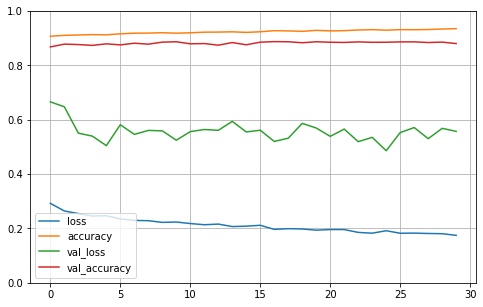

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model.evaluate(X_test_Norm, Y_test_raw)

313/313 [==============================] - 1s 2ms/step - loss: 0.6773 - accuracy: 0.8700


[0.6773421168327332, 0.8700000047683716]

In [47]:
# from random import randrange
# r = np.zeros(3)
# for i in range(3):
#     r[i] = randrange(0,6001)

r = np.random.randint(1,6000, size = 3)

In [48]:
r

array([1781, 2614, 3806])

In [49]:
X_new = X_test_Norm[r]
Y_new = Y_test_raw[r]

In [54]:
y_pred_probabilities = model.predict(X_new)
y_pred_probabilities = y_pred_probabilities.round(2)
y_pred_probabilities

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [56]:
y_pred_classes = model.predict_classes(X_new)
y_pred_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 8, 6])

In [61]:
class_names[y_pred_classes]

array(['Ankle boot', 'Bag', 'Shirt'], dtype='<U11')

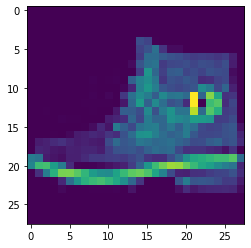

In [64]:
plt.imshow(X_test_raw[r[0]])

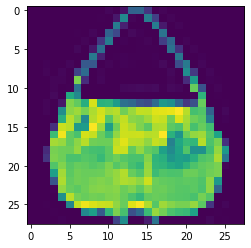

In [65]:
plt.imshow(X_test_raw[r[1]])

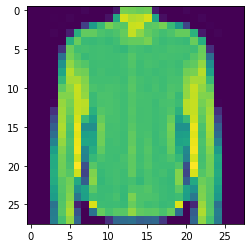

In [66]:
plt.imshow(X_test_raw[r[2]])